In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
%matplotlib inline

In [3]:
table=pd.read_csv('covid_19_india.csv')
table.head()
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


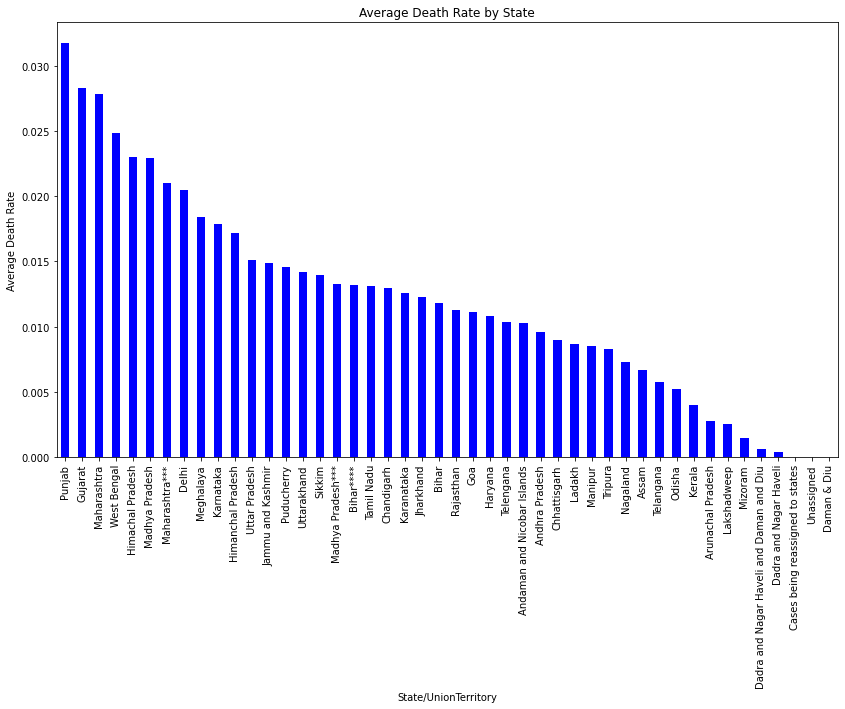

In [4]:
#Graph1

table['Death Rate']=table['Deaths']/table['Confirmed']
death_rate=table.groupby('State/UnionTerritory')['Death Rate'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
death_rate.plot(kind='bar', color='blue') 
plt.title('Average Death Rate by State') 
plt.xlabel('State/UnionTerritory')  
plt.ylabel('Average Death Rate')   
plt.show()

In [5]:
table1=pd.read_csv("uk-vs-swedens.csv")
print(table1)

          Date     Sweden United Kingdom
0   12/14/2023  2,738,868     24,812,582
1   12/13/2023  2,738,868     24,812,582
2   12/12/2023  2,738,868     24,812,582
3   12/11/2023  2,738,868     24,812,582
4   12/10/2023  2,738,868     24,812,582
..         ...        ...            ...
85   9/20/2023  2,716,246     24,704,113
86   9/19/2023  2,716,246     24,704,113
87   9/18/2023  2,716,246     24,704,113
88   9/17/2023  2,716,246     24,704,113
89   9/16/2023  2,716,246     24,704,113

[90 rows x 3 columns]


In [6]:
filteredtab=table1.drop_duplicates(subset=["Sweden","United Kingdom"])

In [7]:
xaxis=filteredtab["Date"]
sweden=filteredtab["Sweden"]
uk=filteredtab["United Kingdom"]

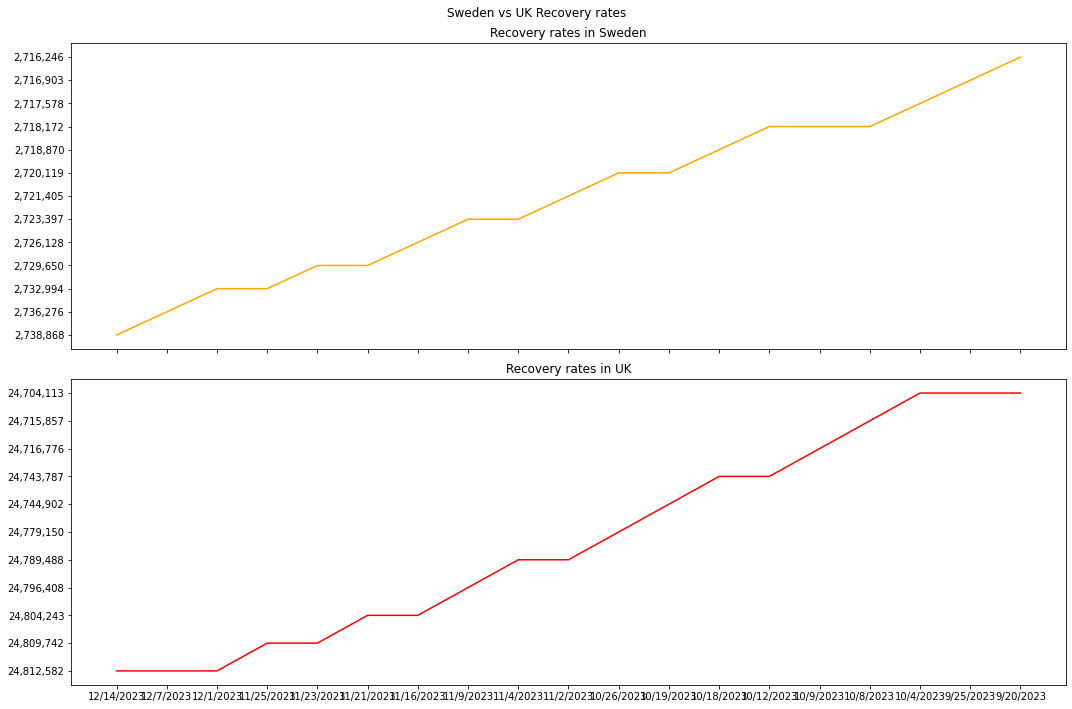

<Figure size 720x720 with 0 Axes>

In [8]:
#Graph-2
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(15,10))
ax1.plot(xaxis,sweden,c="orange")
ax2.plot(xaxis,uk,c="red")
plt.figure(figsize=(10,10))
fig.suptitle("Sweden vs UK Recovery rates")
ax1.set_title("Recovery rates in Sweden")
ax2.set_title("Recovery rates in UK")
fig.tight_layout()

In [9]:
table2=pd.read_csv("Provisional_COVID-19_Death_Counts_by_Week_Ending_Date_and_State.csv")
table2.head()
table2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13986 entries, 0 to 13985
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Data as of                                13986 non-null  object 
 1   Start Date                                13986 non-null  object 
 2   End Date                                  13986 non-null  object 
 3   Group                                     13986 non-null  object 
 4   Year                                      13932 non-null  object 
 5   Month                                     2592 non-null   float64
 6   MMWR Week                                 11124 non-null  float64
 7   Week Ending Date                          11124 non-null  object 
 8   State                                     13986 non-null  object 
 9   COVID-19 Deaths                           11937 non-null  float64
 10  Total Deaths                      

In [10]:
table2.drop(columns=["Data as of","Month","MMWR Week","Footnote","Group","End Date","Year","Week Ending Date"])

,Start Date,State,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,12/29/2019,United States,0.0,60170.0,98.0,4111.0,0.0,434.0,4545.0
1,01/05/2020,United States,1.0,60734.0,97.0,4153.0,1.0,475.0,4628.0
2,01/12/2020,United States,2.0,59362.0,98.0,4066.0,2.0,468.0,4534.0
3,01/19/2020,United States,3.0,59162.0,99.0,3915.0,0.0,500.0,4418.0
4,01/26/2020,United States,0.0,58834.0,99.0,3818.0,0.0,481.0,4299.0
...,...,...,...,...,...,...,...,...,...
13981,01/01/2020,Washington,15399.0,260779.0,NaN,20609.0,8975.0,563.0,27565.0
13982,01/01/2020,West Virginia,8485.0,103626.0,NaN,11110.0,4338.0,207.0,15451.0
13983,01/01/2020,Wisconsin,17327.0,235971.0,NaN,15089.0,6112.0,427.0,26698.0
13984,01/01/2020,Wyoming,1888.0,21687.0,NaN,1929.0,983.0,35.0,2867.0


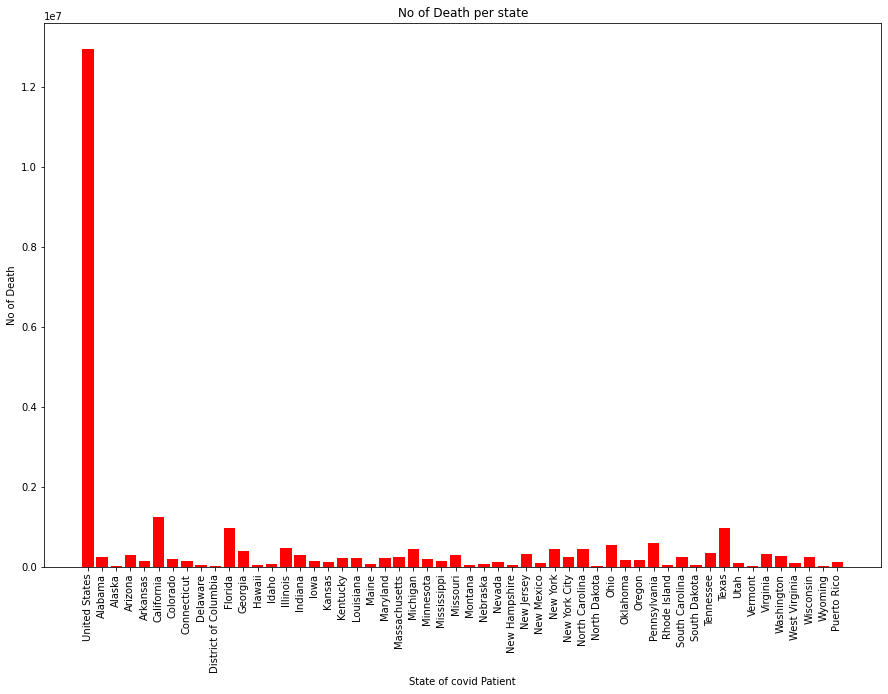

In [11]:
#Graph-3
state=table2["State"]
deaths_total=table2["Total Deaths"]
pneumonia=table2["Pneumonia Deaths"]
fig=plt.figure(figsize=(15,10))
barwidth=0.2
plt.bar(state,deaths_total,color="red")
plt.xlabel("State of covid Patient")
plt.xticks(rotation=90)
plt.ylabel("No of Death")
plt.title("No of Death per state")
plt.show()

In [ ]:
#Graph-4
covid=table2["COVID-19 Deaths"]
pneumonia=table2["Pneumonia Deaths"]
influenza=table2["Influenza Deaths"]
pneumonia_and_covid=table2["Pneumonia and COVID-19 Deaths"]
anyoftheabove=table2["Pneumonia, Influenza, or COVID-19 Deaths"]
fig=plt.figure(figsize=(15,10))
plt.bar(state,deaths_total,width=0.7,color="blue",label="Total")
plt.bar(state,covid,bottom=deaths_total,width=0.7,color="orange",label="COVID")
plt.bar(state,pneumonia,bottom=deaths_total+covid,width=0.7,color="pink",label="Pneumonia")
plt.bar(state,influenza,bottom=deaths_total+covid+pneumonia,width=0.7,color="green",label="Influenza")
plt.xticks(rotation=90)
plt.title("Deaths due to various reasons in United States")
plt.xlabel("States in USA")
plt.ylabel("Count of deaths")
plt.legend(loc="upper right")
plt.show()